# Project DESCRIPTION:::
            
***Develop a Python application that uses the New York Times API to fetch recent news articles from a specific section (e.g., Technology, Politics) and analyze the frequency of keywords to identify what subjects are most talked about.
Key Features:


1.Data Collection:

Use the New York Times API to retrieve news articles from selected sections over a certain period of time.
Use pandas to extract and store relevant data from articles, such as headlines, publication dates, and keywords.

2.Basic Data Analysis:

Count the occurrence of unique keywords within the articles to identify the most frequently mentioned topics.
Analyze the frequency of words over time to see if interest in certain topics is increasing or decreasing.

3.Data Visualization:

Use Matplotlib and Seaborn to create simple visualizations:
Bar chart showing the top 10 most frequently mentioned keywords in the news section.
Line graph illustrating the number of articles published per day or week to spot trends over the selected period.


In [1]:
pip install requests pandas


Note: you may need to restart the kernel to use updated packages.


# Data Collection::

In [1]:
import requests as r
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

from config import API_KEY
print(API_KEY)

4tr4oLn5GgA7ATVLOVG5sDU2MT40rmup


Israel-Gaza War (2023- )                    12
Defense and Military Forces                  8
International Relations                      7
United States International Relations        6
Humanitarian Aid                             6
                                            ..
Koshien: Japan's Field of Dreams (Movie)     1
The Making of a Japanese (Movie)             1
Interscholastic Athletics                    1
Children and Childhood                       1
Foreign Aid                                  1
Name: des_facet, Length: 85, dtype: int64


C:\Users\Fardin\AppData\Local\Temp\ipykernel_25516\541528909.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='des_facet', y='index', data=keywords, ci=None)


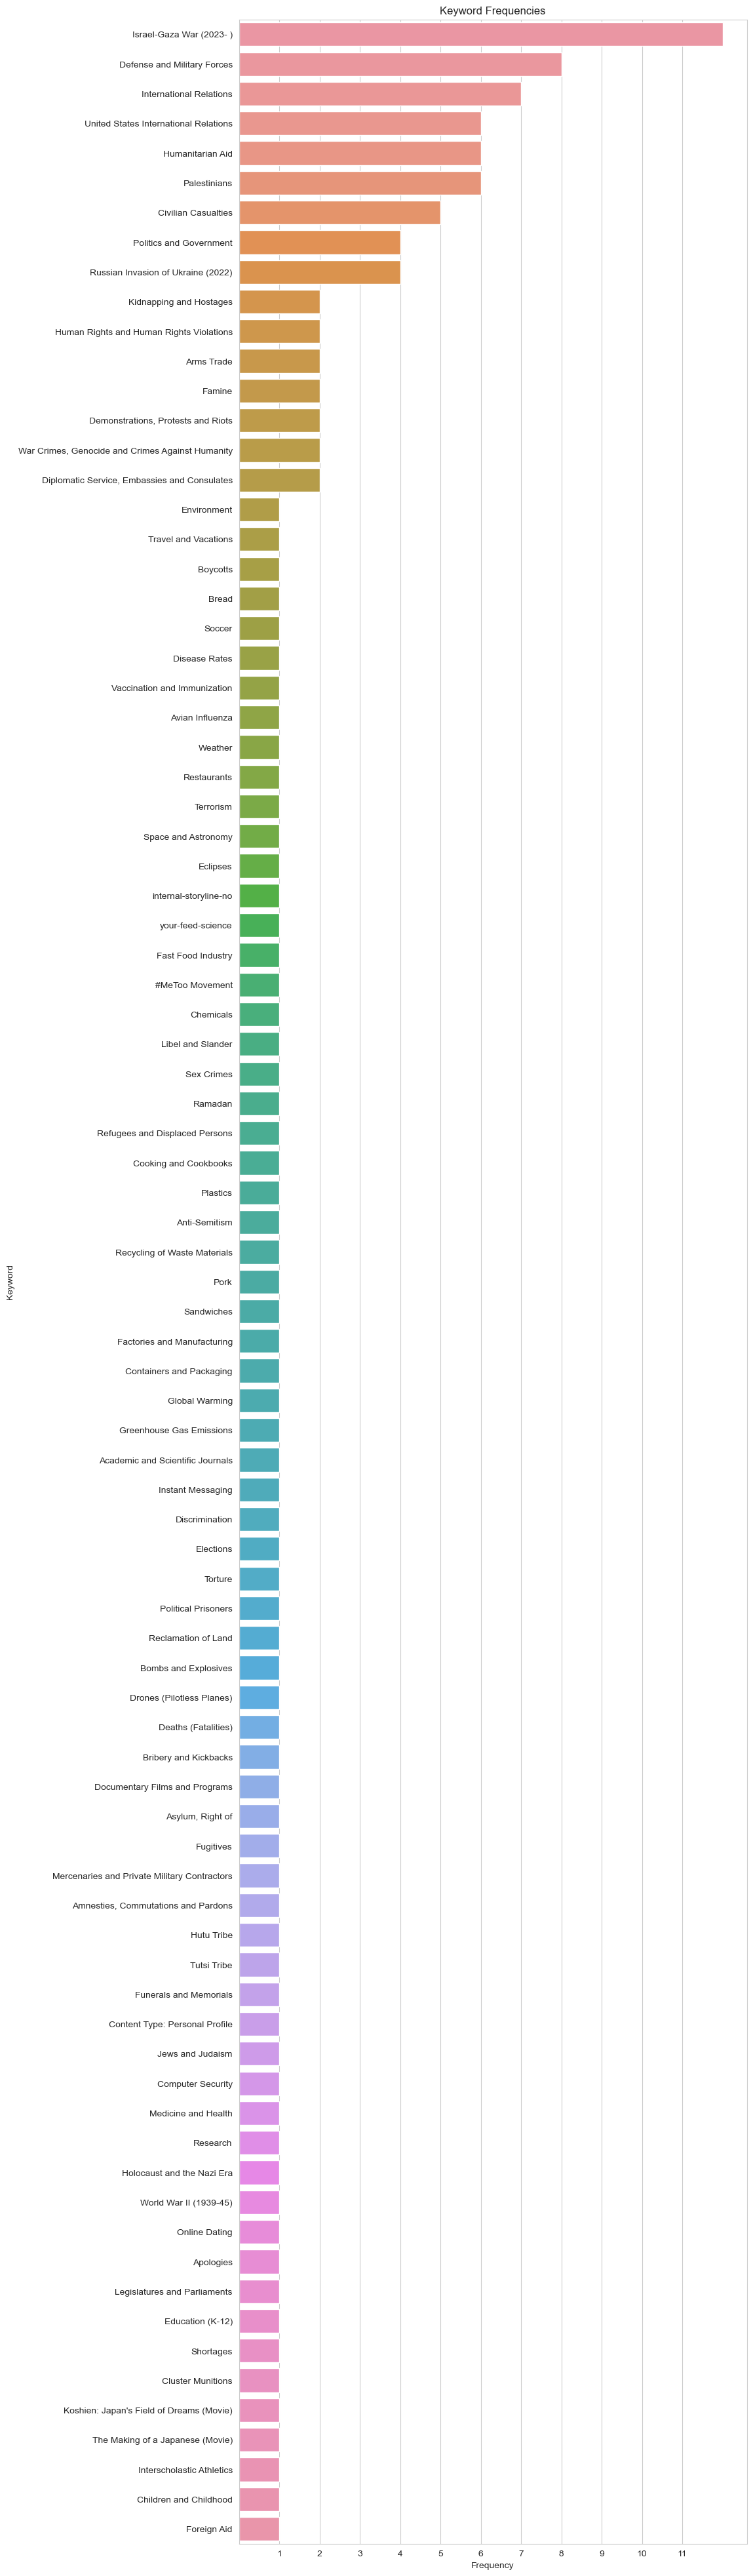

In [2]:
# Since we need to select one specific section, I have choosed world section.
# From NY Times, I subsitutute the link with the specific link in Top stories section from NY Time
top_stories=r.get(f"https://api.nytimes.com/svc/topstories/v2/world.json?api-key={API_KEY}").content.decode()
nyt_home = pd.read_json(StringIO(top_stories))
nyt_home
results = pd.json_normalize(nyt_home['results'])
results
keywords = results['des_facet'].explode()
keywords = keywords.value_counts()
print(keywords)
keywords = keywords.reset_index()

keywords

# Create our chart
sns.set_style("whitegrid")

plt.figure(figsize=(10, 50))
plt.xticks(range(min(keywords['des_facet']),max(keywords['des_facet'])))
sns.barplot(x='des_facet', y='index', data=keywords, ci=None)

plt.title('Keyword Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Keyword')

plt.show()


In [19]:
response = r.get(f"https://api.nytimes.com/svc/topstories/v2/world.json?api-key={API_KEY}")
top_stories = response.json()

# Normalize the JSON response to extract 'results' into a DataFrame
results_df = pd.json_normalize(top_stories['results'])

# Display the relevant columns to ensure the data is loaded correctly
print(results_df[['title', 'published_date', 'des_facet']].head())

# Assuming each story can have multiple keywords and they are in 'des_facet', process these for easier analysis
# First,extracting and displaying headlines, publication dates directly, and keywords separately

# Extract headlines and publication dates directly
headlines = results_df['title']
pub_dates = results_df['published_date']

# Keywords ('des_facet') might need processing if they are nested lists
# Ensure it's a list for each row; if it's not, convert it
keywords = results_df['des_facet'].apply(lambda x: x if isinstance(x, list) else [x])##from chatGPT

print("\nSample Headlines:\n", headlines.head())
print("\nSample Publication Dates:\n", pub_dates.head())
print("\nSample Keywords:\n", keywords.head())

                                               title  \
0  Airstrikes Kill Soldiers in Syria in Apparent ...   
1  Girl, 8, Is Sole Survivor of Bus Plunge: ‘No O...   
2  Czechs Accuse Men of ‘Russian Influence Operat...   
3  U.S.-Funded Broadcaster Leaves Hong Kong, Citi...   
4  A Loyal Israel Ally, Germany Shifts Tone as th...   

              published_date  \
0  2024-03-29T16:29:30-04:00   
1  2024-03-29T07:55:56-04:00   
2  2024-03-29T14:53:06-04:00   
3  2024-03-29T08:46:06-04:00   
4  2024-03-29T10:01:43-04:00   

                                           des_facet  
0  [International Relations, Israel-Gaza War (202...  
1  [Traffic Accidents and Safety, Buses, Deaths (...  
2  [International Relations, Russian Invasion of ...  
3  [United States International Relations, Politi...  
4  [Israel-Gaza War (2023- ), Politics and Govern...  

Sample Headlines:
 0    Airstrikes Kill Soldiers in Syria in Apparent ...
1    Girl, 8, Is Sole Survivor of Bus Plunge: ‘No O...
2    Czech

# DATA  ANAYSIS

Most Frequently Mentioned Topics:
Israel-Gaza War (2023- )                 8
International Relations                  6
Politics and Government                  6
United States International Relations    4
Rumors and Misinformation                3
Global Warming                           3
Palestinians                             3
Russian Invasion of Ukraine (2022)       3
Buses                                    2
Deaths (Fatalities)                      2
Name: des_facet, dtype: int64
des_facet       Agriculture and Farming  Animal Abuse, Rights and Welfare  \
published_date                                                              
2024-03                               1                                 1   

des_facet       Arms Control and Limitation and Disarmament  Art  \
published_date                                                     
2024-03                                                   1    1   

des_facet       Asylum, Right of  Baseball  Breeding of Animals  Buse

C:\Users\Fardin\AppData\Local\Temp\ipykernel_26980\3135335689.py:20: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  keywords_with_dates['published_date'] = pd.to_datetime(keywords_with_dates['published_date']).dt.to_period('M')  # Convert dates to months
C:\Users\Fardin\AppData\Local\Temp\ipykernel_26980\3135335689.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Frequency', y='Keyword', data=keywords_count.head(10), ci=None)


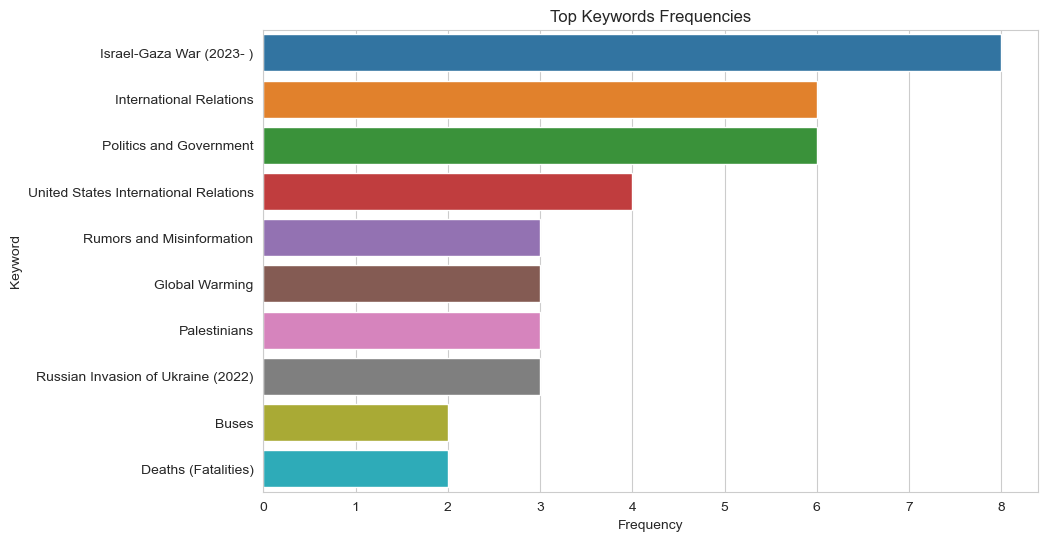

In [28]:
import requests
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already fetched the top stories into `top_stories_response`
API_KEY = "4tr4oLn5GgA7ATVLOVG5sDU2MT40rmup"
top_stories_response = requests.get(f"https://api.nytimes.com/svc/topstories/v2/world.json?api-key={API_KEY}")
top_stories = top_stories_response.content.decode()

# Assuming 'keywords' is a Series of lists from the 'des_facet' column
all_keywords = keywords.explode()  # Flatten the list
keyword_counts = all_keywords.value_counts()  # Count occurrences
print("Most Frequently Mentioned Topics:")
print(keyword_counts.head(10))  # Display top 10

# Create a DataFrame where each keyword is associated with a publication date
keywords_with_dates = results_df[['published_date', 'des_facet']].explode('des_facet')
keywords_with_dates['published_date'] = pd.to_datetime(keywords_with_dates['published_date']).dt.to_period('M')  # Convert dates to months

# Count occurrences of each keyword by month
keywords_frequency_over_time = keywords_with_dates.groupby(['published_date', 'des_facet']).size().unstack(fill_value=0)

print(keywords_frequency_over_time.head())

# Continue with keyword frequency analysis and visualization as before
keywords = results['des_facet'].explode()
keywords_count = keywords.value_counts().reset_index()
keywords_count.columns = ['Keyword', 'Frequency']


sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=keywords_count.head(10), ci=None)
plt.title('Top Keywords Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()



# DATA VISUALIZATION

C:\Users\Fardin\AppData\Local\Temp\ipykernel_25516\1016279019.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Frequency', y='Keyword', data=keywords_count.head(10), ci=None)


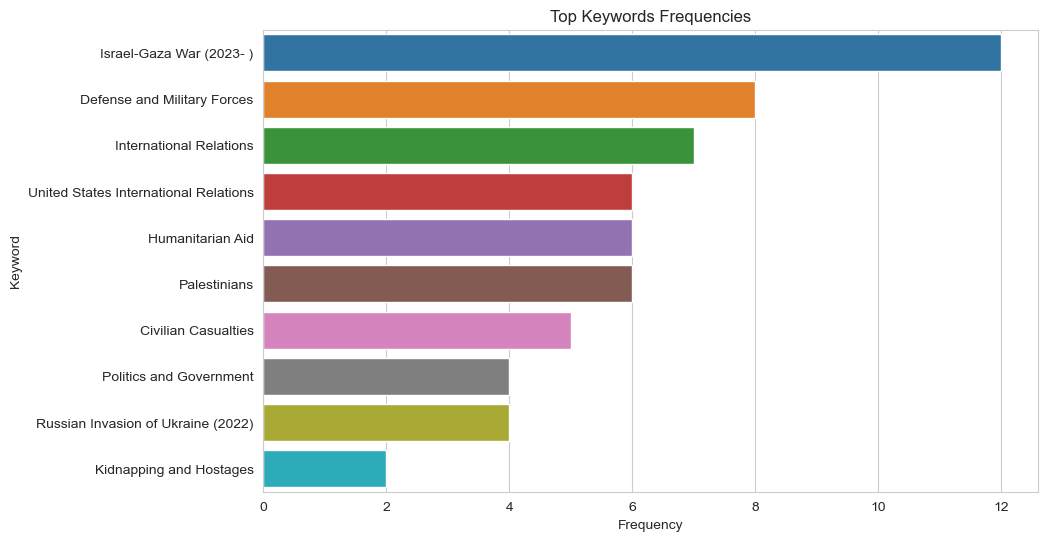

In [3]:
import requests
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

from config import API_KEY

# Fetch the top stories
top_stories_response = requests.get(f"https://api.nytimes.com/svc/topstories/v2/world.json?api-key={API_KEY}")
top_stories = top_stories_response.content.decode()

# Convert the fetched data into a pandas DataFrame
nyt_home = pd.read_json(StringIO(top_stories))
results = pd.json_normalize(nyt_home['results'])

# Explode and count keywords
keywords = results['des_facet'].explode()
keywords_count = keywords.value_counts().reset_index()
keywords_count.columns = ['Keyword', 'Frequency']

# Create the chart
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=keywords_count.head(10), ci=None) 
plt.title('Top Keywords Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()
